In [ ]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.

In [ ]:
import preliz as pz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

For this project, I will be determining the true average of New York Giants star Daniel Jones's average number of passing yards over the past 3 seasons.

Passing yards is a basic statistic used in football to measure how many yards a quarterback has gained by throwing the ball. For the past 3 years, the Giants have remained a decent team in the NFC East with one playoff win in that period. Throughout Jones's career, he has been regarded as a contreversial quarterback due to his poor performance in important situations.

Below, I have put the number of passing yards per game from the past three seasons.

In [ ]:
data_ypg = [
267,
249,
266,
402,
98,
242,
203,
222,
110,
167,
202,
177,
334,
160,
169,
200,
228,
341,
197,
176,
202,
173,
217,
257,
281,
236,
178,
186]

It should be noted that Jones only played 5 games in the 2023 season and played an extra 2 in 2022 due to injuries and a playoff berth respectfully.

(array([2., 0., 8., 6., 5., 3., 1., 2., 0., 1.]),
 array([ 98. , 128.4, 158.8, 189.2, 219.6, 250. , 280.4, 310.8, 341.2,
        371.6, 402. ]),
 <BarContainer object of 10 artists>)

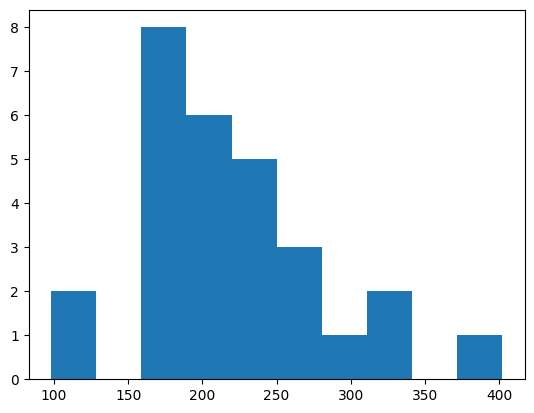

In [ ]:
plt.hist(data_ypg)

In [ ]:
with pm.Model() as model_ypgN:

    μ = pm.Normal('μ', mu=20, sigma=5)

    σ = pm.HalfNormal('σ', sigma=5)

    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=data_ypg)
    idata_ypgN = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

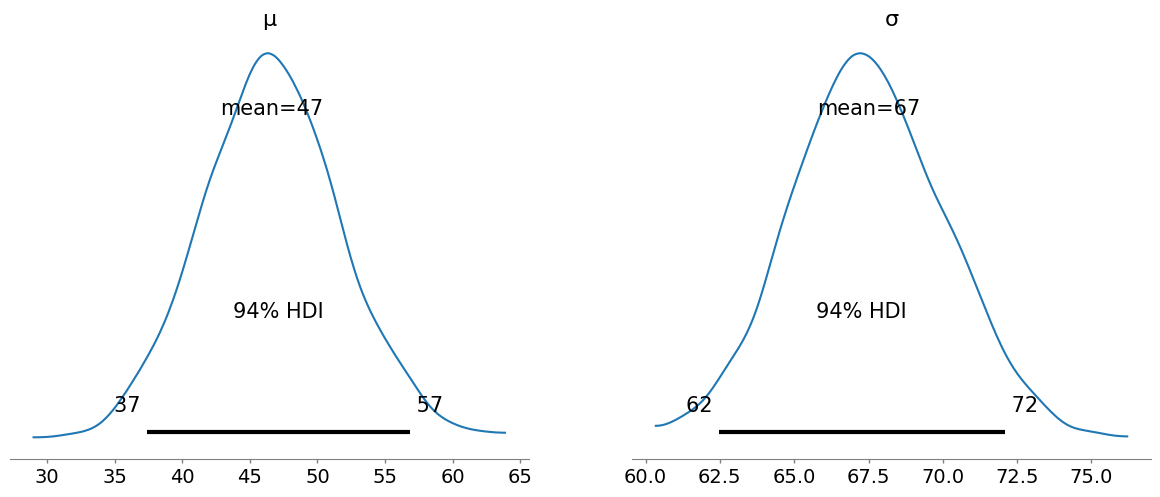

In [ ]:
az.plot_posterior(idata_ypgN)

In [ ]:
pm.sample_posterior_predictive(idata_ypgN, model=model_ypgN, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

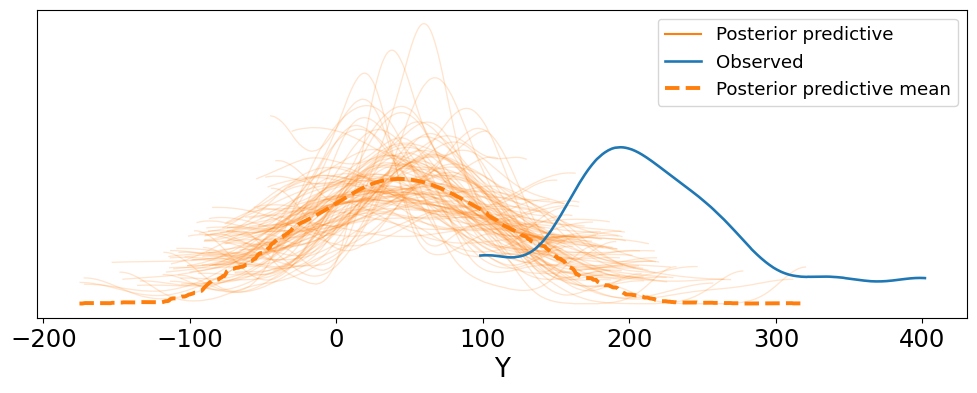

In [ ]:
az.plot_ppc(idata_ypgN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

This model does not fit the likelihood as it is skewed right. To correct it, I have decded to use the skew student t distribution.

In [18]:
with pm.Model() as model_ypgST:

    μ = pm.Uniform('μ', lower=45, upper=70)

    σ = pm.HalfNormal('σ', sigma=5)

    a = pm.HalfNormal('a', sigma=7)
    b = pm.HalfNormal('b', sigma=1)

    y = pm.SkewStudentT('y',mu=μ, sigma=σ, a = a, b = b, observed=data_ypg)
    idata_ypgST = pm.sample()

Output()

Output()

In [19]:
pm.sample_posterior_predictive(idata_ypgST, model=model_ypgST, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

array([<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>,
       <Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

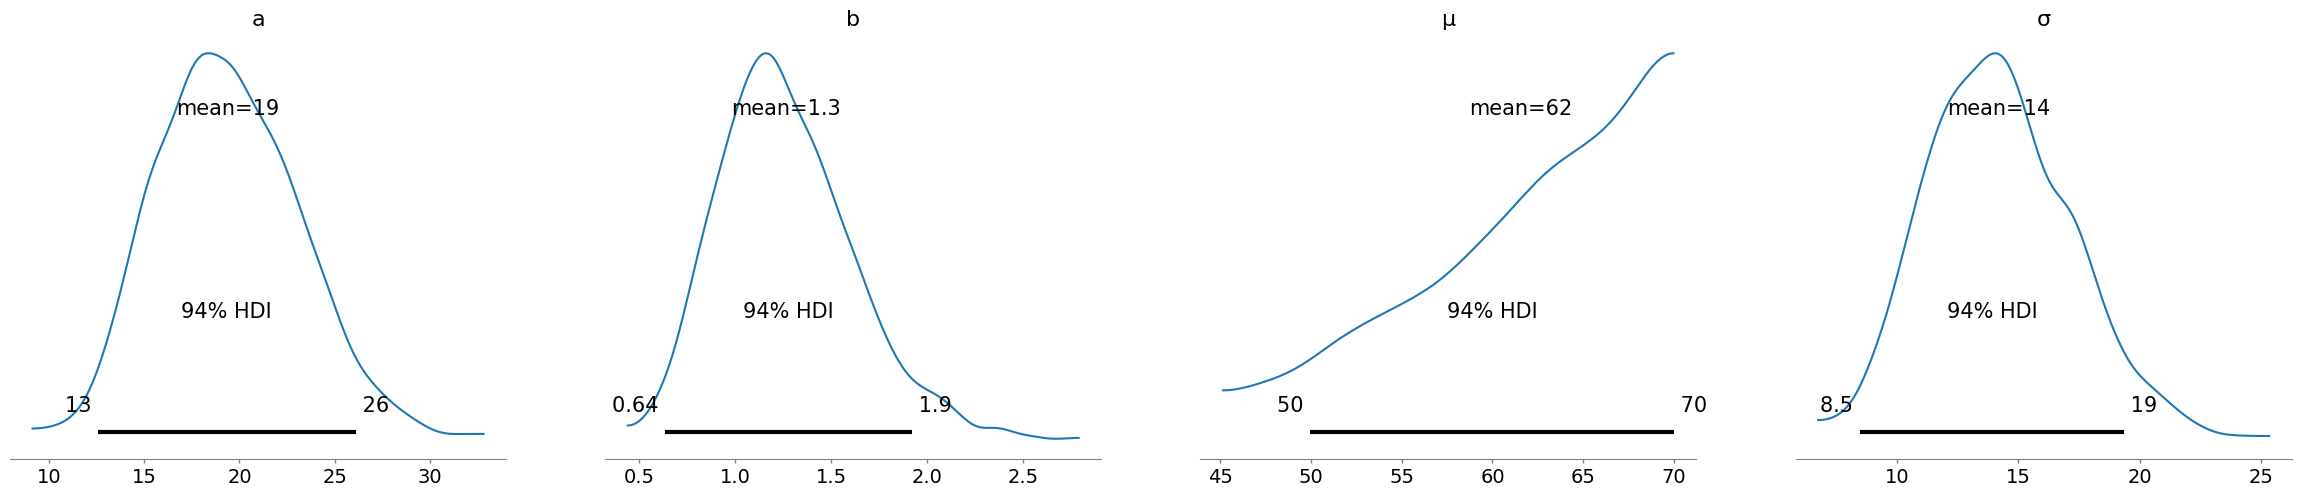

In [20]:
az.plot_posterior(idata_ypgST)

In [21]:
pm.sample_posterior_predictive(idata_ypgST, model=model_ypgST, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

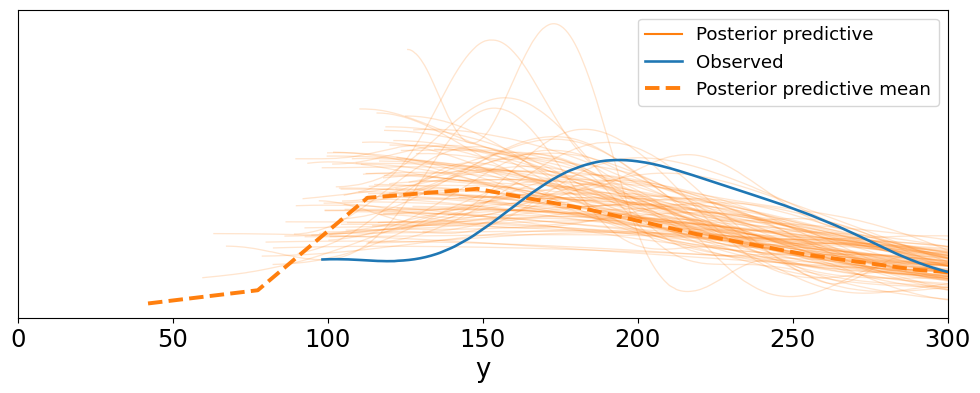

In [28]:
az.plot_ppc(idata_ypgST, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
plt.xlim(0, 300)
plt.show()

#conclusion
Even though the data doesnt perfectly fit the model, we can still clearly see the the skew student t distribution fits the shape of the data. We can also observe that DJ throws around the 200 ypg range which puts him below average in the NFL by around 75 yards with around the same ypg as Cardinals Quarterback and proud OU alumnist Kyler Murray.